In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

from keras.models import Sequential

from keras.layers import Dense,Activation
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [6]:
activation_func = ['sigmoid','softmax', 'elu', 'selu', 'softplus', 'softsign', 
                   'relu', 'tanh', 'hard_sigmoid', 'linear']
loss_func = ['binary_crossentropy', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error',
            'mean_squared_logarithmic_error', 'squared_hinge', 'hinge', 'logcosh', 'kullback_leibler_divergence', 
            'poisson', 'cosine_proximity']
optimizer_scheme = ['Adagrad','SGD', 'RMSprop', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

In [7]:
data_attack1 = pd.read_csv("dataset/attack1with7FeatureVector.csv")
data_attack1 = data_attack1.dropna(axis=0, how="any")#remove invalid data
sum(np.array(data_attack1['Label']))/data_attack1['Label'].shape[0]/1

data_attack1.shape

X = data_attack1.iloc[:,12:] #In our case, we use the feature of 1-6, the feature of distance rejected
n = X.shape[1]
y = data_attack1.iloc[:,11]
X = np.reshape(X.values, (X.shape[0], X.shape[1]))
y =np.reshape(y.values, (y.shape[0],  1))

### Choosing the Activation Function

In [10]:
activation_func_use = activation_func[0]
loss_func_use = loss_func[0]
optimizer_scheme_use = optimizer_scheme[0]
list_activation = []

for i in range(len(activation_func)):
    activation_func_use = activation_func[i]
    print('********For the activation function', activation_func[i], '********')
    model = Sequential()
    model.add(Dense(64, input_dim=n, activation=activation_func_use))
    model.add(Dense(16, activation=activation_func_use))
    model.add(Dense(1, activation=activation_func_use))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )

    model.compile(loss=loss_func_use, optimizer=optimizer_scheme_use, metrics=['binary_accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=100,verbose =0)

    loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

    print('For attack1: The loss is', loss_and_metrics[0], ', the accuracy is', loss_and_metrics[1])
    list_activation.append([activation_func_use,loss_and_metrics[1]])

********For the activation function sigmoid ********
6118/6118 [==============================] - 0s 19us/step
For attack1: The loss is 0.06360859940472129 , the accuracy is 0.9856162144686514
********For the activation function softmax ********
6118/6118 [==============================] - 0s 22us/step
For attack1: The loss is 11.053872787784853 , the accuracy is 0.30663615561127855
********For the activation function elu ********
6118/6118 [==============================] - 0s 21us/step
For attack1: The loss is 0.36891368435815725 , the accuracy is 0.5075187970022237
********For the activation function selu ********
6118/6118 [==============================] - 0s 28us/step
For attack1: The loss is 4.63794431860987 , the accuracy is 0.042007191939052314
********For the activation function softplus ********
6118/6118 [==============================] - 0s 25us/step
For attack1: The loss is 11.019997190829 , the accuracy is 0.022229486771948432
********For the activation function softsign

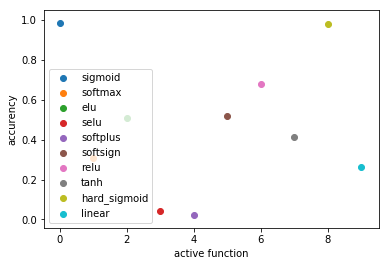

In [13]:
for i in range(len(list_activation)):
    plt.scatter(i,list_activation[i][1],label = list_activation[i][0])
    plt.legend(loc='best')    
plt.xlabel("active function")
plt.ylabel("accurency")
plt.show()


### Choosing the Loss function


In [17]:
activation_func_use = activation_func[0]
loss_func_use = loss_func[0]
optimizer_scheme_use = optimizer_scheme[0]
list_loss =[]
for i in range(len(loss_func)):
    loss_func_use = loss_func[i]
    print('********For the loss function', loss_func[i], '********')
    model = Sequential()
    model.add(Dense(64, input_dim=n, activation=activation_func_use))
    model.add(Dense(16, activation=activation_func_use))
    model.add(Dense(1, activation=activation_func_use))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )

    model.compile(loss=loss_func_use, optimizer=optimizer_scheme_use, metrics=['binary_accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=100,verbose=0)

    loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

    print('For attack1: The loss is', loss_and_metrics[0], ', the accuracy is', loss_and_metrics[1])
    list_loss.append([loss_func_use,loss_and_metrics[1]])

********For the loss function binary_crossentropy ********
6118/6118 [==============================] - 1s 84us/step
For attack1: The loss is 0.06044991076937607 , the accuracy is 0.9859431181791055
********For the loss function mean_squared_error ********
6118/6118 [==============================] - 0s 69us/step
For attack1: The loss is 0.013367368551972802 , the accuracy is 0.9874141876625057
********For the loss function mean_absolute_error ********
6118/6118 [==============================] - 0s 70us/step
For attack1: The loss is 0.022777837379943627 , the accuracy is 0.9864334745241872
********For the loss function mean_absolute_percentage_error ********
6118/6118 [==============================] - 0s 72us/step
For attack1: The loss is 910188.5389016018 , the accuracy is 0.6847008830700563
********For the loss function mean_squared_logarithmic_error ********
6118/6118 [==============================] - 0s 70us/step
For attack1: The loss is 0.006046326739951632 , the accuracy is 0.

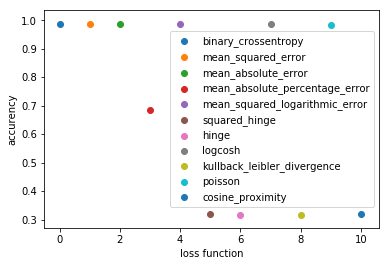

In [18]:
for i in range(len(list_loss)):
    plt.scatter(i,list_loss[i][1],label = list_loss[i][0])
    plt.legend(loc='best')    
plt.xlabel("loss function")
plt.ylabel("accurency")
plt.show()


### Choosing the proper Optimizer

In [21]:
activation_func_use = activation_func[0]
loss_func_use = loss_func[0]
optimizer_scheme_use = optimizer_scheme[0]
list_optimizer = []
for i in range(len(optimizer_scheme)):
    optimizer_scheme_use = optimizer_scheme[i]
    print('***********For the optimizer_scheme', optimizer_scheme[i], '***********')
    model = Sequential()
    model.add(Dense(64, input_dim=n, activation=activation_func_use))
    model.add(Dense(16, activation=activation_func_use))
    model.add(Dense(1, activation=activation_func_use))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )

    model.compile(loss=loss_func_use, optimizer=optimizer_scheme_use, metrics=['binary_accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=100,verbose = 0)

    loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

    print('For attack1: The loss is', loss_and_metrics[0], ', the accuracy is', loss_and_metrics[1])
    list_optimizer.append([optimizer_scheme_use,loss_and_metrics[1]])

***********For the optimizer_scheme Adagrad ***********
6118/6118 [==============================] - 1s 89us/step
For attack1: The loss is 0.05788782862602359 , the accuracy is 0.9867603792088918
***********For the optimizer_scheme SGD ***********
6118/6118 [==============================] - 1s 90us/step
For attack1: The loss is 0.257161462655758 , the accuracy is 0.9303694013755825
***********For the optimizer_scheme RMSprop ***********
6118/6118 [==============================] - 1s 90us/step
For attack1: The loss is 0.05341765109416744 , the accuracy is 0.9867603787217666
***********For the optimizer_scheme Adadelta ***********
6118/6118 [==============================] - 1s 96us/step
For attack1: The loss is 0.058740686911428315 , the accuracy is 0.9870872834454412
***********For the optimizer_scheme Adam ***********
6118/6118 [==============================] - 1s 96us/step
For attack1: The loss is 0.03810957531332385 , the accuracy is 0.9913370377606682
***********For the optimize

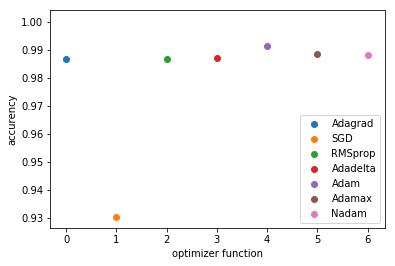

In [24]:
for i in range(len(list_optimizer)):
    plt.scatter(i,list_optimizer[i][1],label = list_optimizer[i][0])
    plt.legend(loc='best')    
plt.xlabel("optimizer function")
plt.ylabel("accurency")
plt.show()
